In [1]:
# Module 2 Notes
# Gradient Descent

# %pip install scikit-learn 

import numpy as np
# for vectors/matrices
import matplotlib.pyplot as plt
# for plots
import pandas as pd
# for loading/previewing tabular data





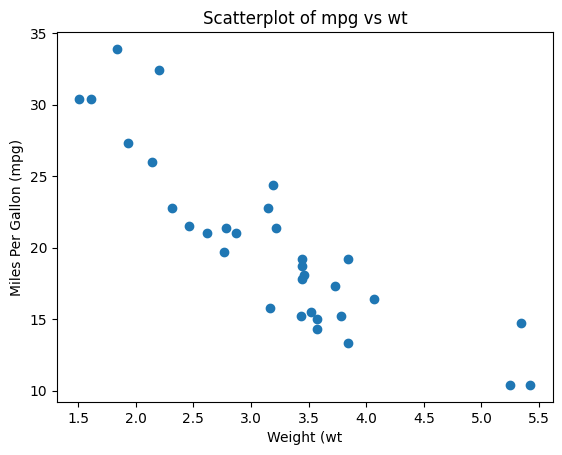

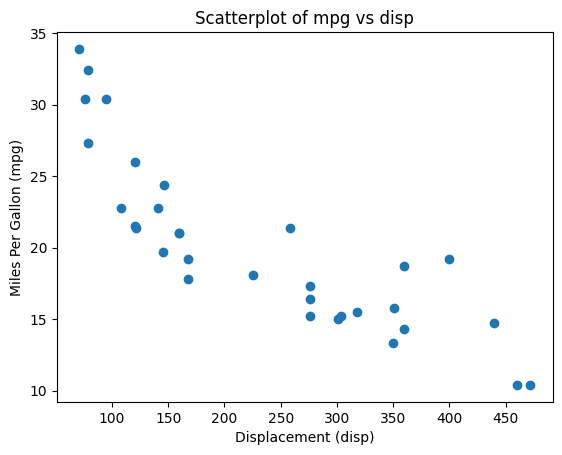

In [2]:
cars = pd.read_csv('/Users/blove/PycharmProjects/deepLearning/Data/cars.csv')
# Expects columns like: mpg, wt, disp

X = cars[['wt', 'disp']].to_numpy()
# features matrix (n_samples, 2)

y = cars['mpg'].to_numpy()
# target vector (n_samples)          

# Exploratory plots
plt.scatter(cars['wt'], cars['mpg'])
plt.xlabel('Weight (wt')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('Scatterplot of mpg vs wt')
plt.show()

plt.scatter(cars['disp'], cars['mpg'])
plt.xlabel('Displacement (disp)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('Scatterplot of mpg vs disp')
plt.show()

In [3]:
# Linear Regression by Gradient Descent (with an intercept)
# Adding an intercept column and making predictions

def add_intercept(X):
    #Add a column of ones (bias term) to the left of X
    ones = np.ones((X.shape[0], 1))
    return np.concatenate([ones, X], axis = 1) # 'axis', refers ot a dimension of an array

def predict_linear(w, X):
    #Compute predictions X @ w, where X has the intercept column
    X_tilde = add_intercept(X)
    return X_tilde @ w #shape: (n, )

In [4]:
#Define the loss function (MSE)

def mse_loss(w, X, y):
    #Mean squarred Error: mean ((Xw - y)^2)
    y_hat = predict_linear(w, X)
    y + y.reshape(-1)
    return np.mean((y_hat - y) ** 2)

In [5]:
# Gradient of the MSE
def mse_gradient(w, X, y):
    #Gradient of MSE wrt w: (2/n) * X̃^T (X̃w − y).
    X_tilde = add_intercept(X)
    y_hat = X_tilde @ w
    residuals = y_hat - y.reshape(-1)
    n = X_tilde.shape[0]
    return (2.0/n) * (X_tilde.T @ residuals)

In [6]:
# Gradient Descent Loop
def gradient_descent_linear(X, y, lr=1e-6, epochs=20_000):
# initialize weights small random values: (d + 1,) including intercept
    w = np.random.normal(0, 0.1, size=X.shape[1] + 1)
    history = [mse_loss(w, X, y)]

    for _ in range(epochs):
        grad = mse_gradient(w, X, y)
        w = w - lr * grad
        history.append(mse_loss(w, X, y))

    return w, history
w_hist, loss_hist = gradient_descent_linear(X, y, lr= 1e-6)
           

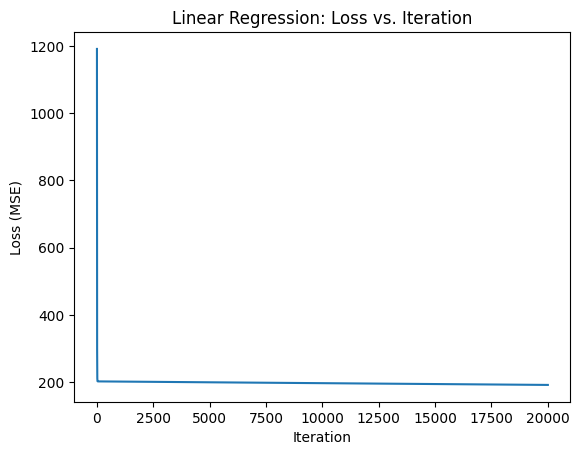

Final weights = [bias, wt_coef, disp_copef]: [0.06384304 0.45220306 0.05321426]


In [7]:
# Plot Training Loss

plt.plot(loss_hist)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Linear Regression: Loss vs. Iteration')
plt.show()

print('Final weights = [bias, wt_coef, disp_copef]:', w_hist)

# Loss should decrease & flatten, bias is intercept; positive wt_coef or disp_coef
# means mpg increase with that feature; negaitve means decreases. 

In [8]:
# Logistic Regression Building Blocks

#Sigmoid & Binary Cross-entropy (BCE)

def sigmoid(z):
    z = np.clip(z, -500, 500) # numeric stability
    return 1/(1 + np.exp(-z))

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))


In [15]:
# Preprocessing helpers: center vs standardize
def center_only(X):
    mu = X.mean(axis=0, keepdims=True)
    return X - mu, mu, None

def standardize(X):
    mu = X.mean(axis=0, keepdims=True)
    sd= X.std(axis=0, ddof=0, keepdims=True)
    sd[sd == 0] = 1.0
    return (X - mu) / sd, mu, sd

def apply_transform(X, mu, sd):
    if sd is None:
        return X - mu
    out = (X - mu) / sd
    out[:, sd.ravel() == 0] = 0.0
    return out

    # use the oprevious two chunks to helo the iptimizer when features are on different offsets.
    # standardizing (zero mean, unit variance) helps when features also have very different scales

In [16]:
# Logistic Regression - Single Feature, No Intercept

# We fit a 1‑D weight w and predict 𝑝 =𝜎(𝑤𝑥). Preprocess x (center or standardize), 
# but do not add an intercept.

def fit_logreg_single_no_intercept(x, y, lr=0.1, epochs = 100, center = True, scale=False):
    x = np.asarray(x).reshape(-1, 1).astype(float)
    y = np.asarray(y).reshape(-1).astype(float)

    # Transform x (not y)

    if scale:
        x_t, mu, sd = standardize(x)
    elif center:
        x_t, mu, sd = center_only(x)
    else:
        x_t, mu, sd = x.copy(), np.zeros((1, 1)), None

    w = 0.0 # scalar weight
    history = [0]

    for _ in range(epochs):
        z = x_t.ravel() * w
        p = sigmoid(z)
        loss = binary_cross_entropy(y, p)
        history.append(loss)

        # dL/dw = mean((p - y) * x)
        grad = np.mean((p - y) * x_t.ravel())
        w -= lr * grad
    return w, history, (mu, sd)

def predict_proba_single_no_intercept(x, w, transform_params):
    mu, sd = transform_params
    x = np.asarray(x).reshape(-1, 1).astype(float)
    x_t = apply_transform(x, mu, sd)
    return sigmoid(x_t.ravel() * w)


In [17]:
# Plot BCE Loss

def plot_loss(history, title = 'Loss'):
    plt.figure()
    plt.plot(history)
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross-Entropy')
    plt.title(title)
    plt.show()

In [18]:
# Accuracy Helper

def accuracy(y_true, y_prob, thresh=0.5):
    y_true = np.asarray(y_true).reshape(-1)
    return np.mean((y_prob >= thresh) == y_true)

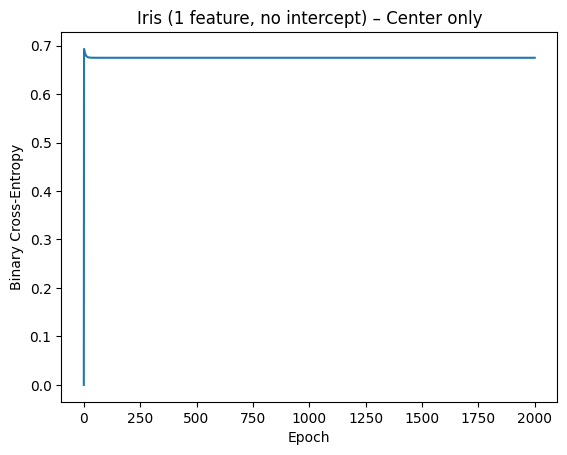

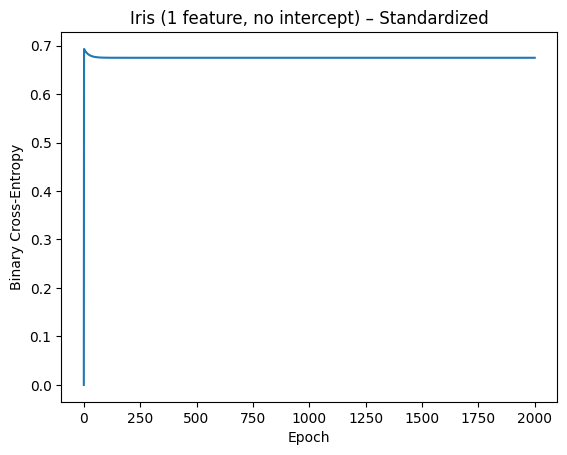

Acc (center): 0.62
Acc (std):    0.62


In [19]:
from sklearn import datasets

# Build a binary iris task: Setosa (0) vs Versicolor (1)
# Single feature = petal length (index 2)
iris = datasets.load_iris()
X_all = iris.data[:, [2]]
y_all = (iris.target == 1).astype(float)  # (n,)

# Fit logistic regression (no intercept) — centered data
w_c, hist_c, tf_c = fit_logreg_single_no_intercept(X_all.ravel(), y_all, lr=0.1, epochs=2000, center=True)
plot_loss(hist_c, 'Iris (1 feature, no intercept) – Center only')

# Fit logistic regression (no intercept) — standardized data
w_s, hist_s, tf_s = fit_logreg_single_no_intercept(X_all.ravel(), y_all, lr=0.1, epochs=2000, center=False, scale=True)
plot_loss(hist_s, 'Iris (1 feature, no intercept) – Standardized')

# Predict probabilities using both models
p_c = predict_proba_single_no_intercept(X_all.ravel(), w_c, tf_c)
p_s = predict_proba_single_no_intercept(X_all.ravel(), w_s, tf_s)

# Compute accuracies
print('Acc (center):', accuracy(y_all, p_c))
print('Acc (std):   ', accuracy(y_all, p_s))



In [39]:
# To make sure the shape of certain perrands is alright


print(X_all.shape, y_all.shape)


# To make sure the gradient is working as expected, the gradient is not being too small, 
# and the mean prediction remains around 0.5. 
print("Weight:", w_c)
print("Mean prediction:", np.mean(p_c))



(150, 1) (150,)
Weight: 0.22054824474153772
Mean prediction: 0.5003219955063406


In [48]:
# Logistic Regression - Multi Feature, with Intercept

def fit_logreg_multi_with_intercept(X, y, lr=0.1, epochs = 1000, center=True, scale = False):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1)

    if scale:
        X_t, mu, sd = standardize(X)
    elif center:
        X_t, mu, sd = X.copy(), np.zeros((1, X.shape[1])), None

    X_design = np.hstack([np.ones((X_t.shape[0], 1)), X_t])
    beta = np.zeros(X_design.shape[1])

    history = [] 
    n = X_design.shape[0]

    for _ in range(epochs):
        z = X_design @ beta
        p = sigmoid(z)
        loss = binary_cross_entropy(y, p)
        history.append(loss)

        # gradient: (1/n) * X̃^T (p − y)
        grad = (X_design.T @ (p - y)) / n
        beta -= lr * grad
   
    return beta, history, (mu, sd)

def predict_proba_multi_with_intercept(X, beta, transform_params):
    mu, sd = transform_params
    X = np.asarray(X, dtype=float)
    X_t = apply_transform(X, mu, sd)
    X_d =np.hstack([np.ones((X_t.shape[0], 1)), X_t])
    return sigmoid(X_d @ beta)


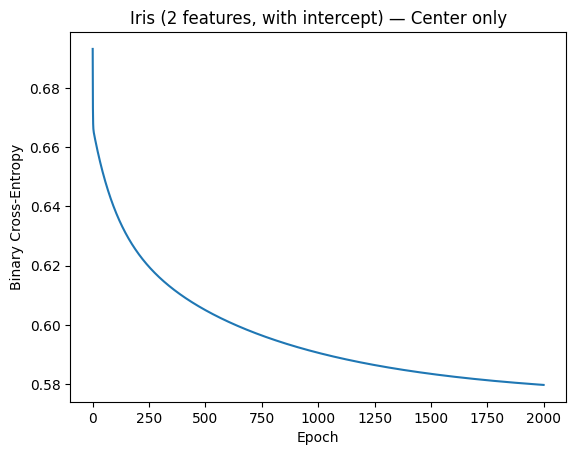

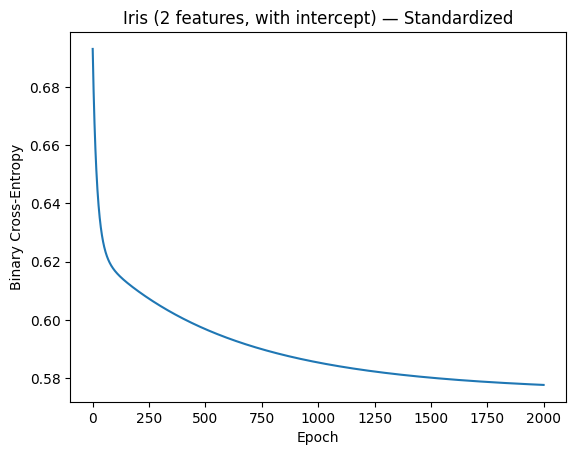

Iris 2-feet Acc (center) 0.5866666666666667
Iris 2‑feat Acc (std):  0.6133333333333333


In [49]:
# Examples

# Iris with two features: petal length (2), petal width (3)

iris = datasets.load_iris()
X2 = iris.data[:, [2, 3]]
y2 = (iris.target == 1).astype(float)

beta_c2, hist_c2, tf_c2 = fit_logreg_multi_with_intercept(X2, y2, lr=0.1, epochs=2000, center=True)
plot_loss(hist_c2, 'Iris (2 features, with intercept) — Center only')

                                                          
beta_s2, hist_s2, tf_s2, = fit_logreg_multi_with_intercept(X2, y2, lr=0.1, epochs=2000, center=False, scale=True)
plot_loss(hist_s2, 'Iris (2 features, with intercept) — Standardized')

print('Iris 2-feet Acc (center)', accuracy(y2, predict_proba_multi_with_intercept(X2, beta_c2, tf_c2)))
print('Iris 2‑feat Acc (std): ', accuracy(y2, predict_proba_multi_with_intercept(X2, beta_s2, tf_s2)))

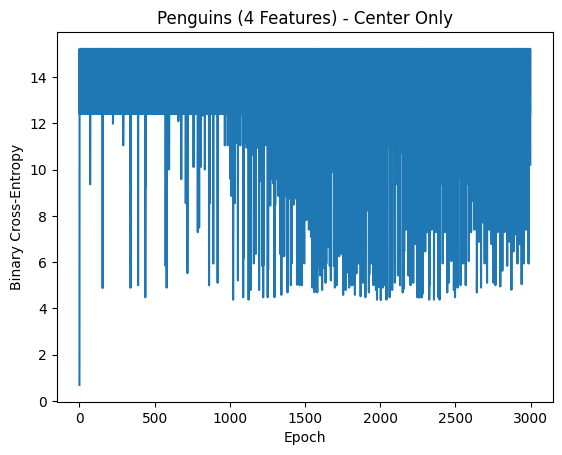

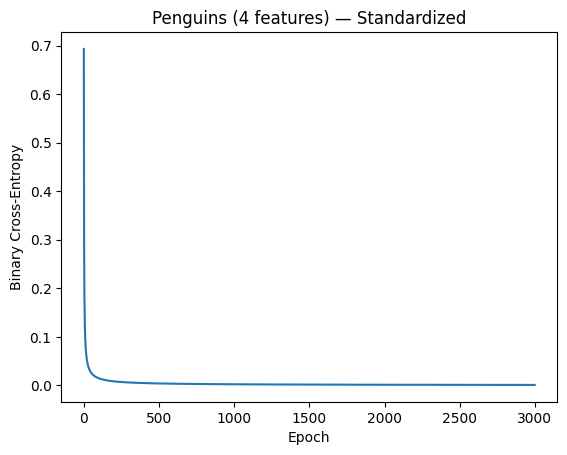

Penguins 4-feet Acc (center): 0.4490566037735849
Penguins 4-feet Acc (std:   1.0


In [51]:
 # Extra, (Adelie vs Gentoo)
# %pip install seaborn
import seaborn as sns

peng = sns.load_dataset('penguins').dropna()
peng = peng[peng['species'].isin(['Adelie','Gentoo'])]
yp = (peng['species'] == 'Gentoo').astype(float).to_numpy()
Xp = peng[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].to_numpy()

beta_pc, hist_pc, tf_pc = fit_logreg_multi_with_intercept(Xp, yp, lr=0.05, epochs=3000, center=True)
plot_loss(hist_pc, 'Penguins (4 Features) - Center Only')

beta_ps, hist_ps, tf_ps = fit_logreg_multi_with_intercept(Xp, yp, lr=0.5, epochs=3000, center=False, scale=-True)
plot_loss(hist_ps, 'Penguins (4 features) — Standardized')

print('Penguins 4-feet Acc (center):', accuracy(yp, predict_proba_multi_with_intercept(Xp, beta_pc, tf_pc)))
print('Penguins 4-feet Acc (std):  ', accuracy(yp, predict_proba_multi_with_intercept(Xp, beta_ps, tf_ps)))

/var/folders/rw/mc1vtn9n1pl95xvzwsw_c69m0000gn/T/ipykernel_56370/707510845.py:7: RuntimeWarning: overflow encountered in square
  return np.mean((y_hat - y) ** 2)
/var/folders/rw/mc1vtn9n1pl95xvzwsw_c69m0000gn/T/ipykernel_56370/717606980.py:8: RuntimeWarning: overflow encountered in matmul
  return (2.0/n) * (X_tilde.T @ residuals)
/var/folders/rw/mc1vtn9n1pl95xvzwsw_c69m0000gn/T/ipykernel_56370/4201505054.py:9: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * grad


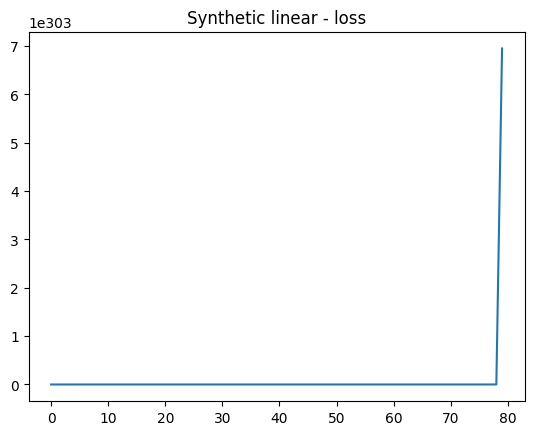

Estimated [bias, wt, disp] [nan nan nan]


In [54]:
# Try it yourself..?
# Generate synthetic linear-regression data

rng = np.random.default_rng(0)

N = 100
wt = rng.normal(3.0, 0.5, size=N) # like thousands of lbs
disp = rng.normal(200.0, 40.0, size=N) # engine displacement
noise = rng.normal(0, 2.0, size=N )
mpg = 40 - 3*wt - 0.02*disp + noise

Xsyn = np.c_[wt, disp]
ws, hists = gradient_descent_linear(Xsyn, mpg, lr=1e-3, epochs=5000)
plt.plot(hists); plt.title('Synthetic linear - loss'); plt.show()
print('Estimated [bias, wt, disp]', ws)

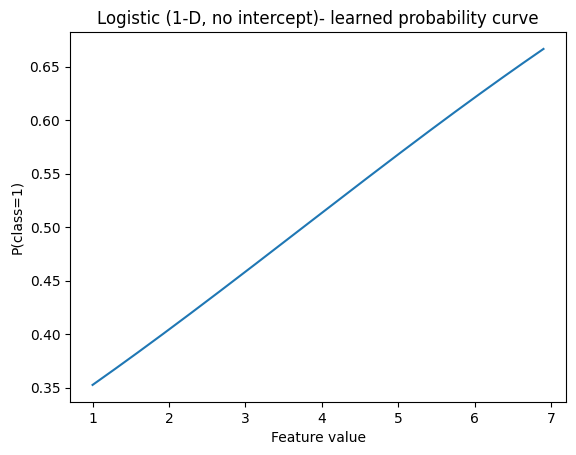

In [56]:
# Plot a probability curve for the 1-D logistic model

# using the iris single-feature w_s learned above

xs = np.linspace(X_all.min(), X_all.max(), 200)
ps = predict_proba_single_no_intercept(xs, w_s, tf_s)

plt.plot(xs, ps)
plt.xlabel('Feature value')
plt.ylabel('P(class=1)')
plt.title('Logistic (1-D, no intercept)- learned probability curve')
plt.show()

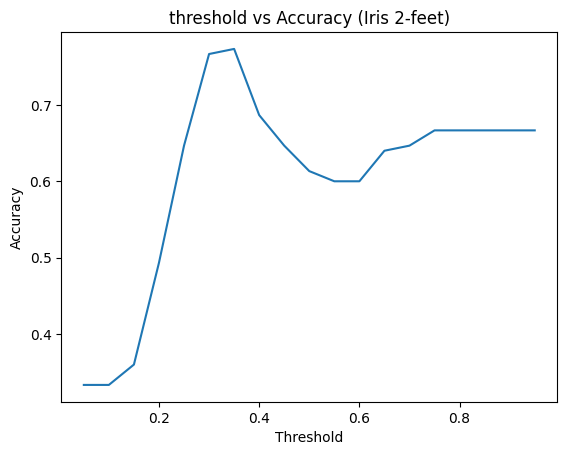

In [59]:
# Confusion matrix & threshold sweep

def confusion(y_true, y_prob, thresh=0.5):
    y_true = np.asarray(y_true).astype(int)
    y_hat = (y_prob >= thresh).astype(int)
    tp = np.sum((y_true==1) & (y_hat ==1))
    tn = np.sum((y_true==0) & (y_hat ==0))
    fp = np.sum((y_true==0) & (y_hat==1))
    fn = np.sum((y_true==1) & (y_hat==0))

    # sweep thresholds
ths = np.linspace(0.05, 0.95, 19)
accs = []
for t in ths:
    accs.append(accuracy(y2, predict_proba_multi_with_intercept(X2, beta_s2, tf_s2), t))
plt.plot(ths, accs)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('threshold vs Accuracy (Iris 2-feet)')
plt.show()

In [ ]:
# Some common pitfalls & fixes

# Shapes: ensure y is 1-D when subtracting (y.reshape(-1)

# Learning Rate: too large leads to divergence, too small leads to a very slow prediction

# No intercept vs intercept: know when you're adding a bias term

# Feature scaling: important for stable/fast convergence 
    # in logistic (and often linear) regression

# Clipping: apply in sigmoid &/ BCE to avoid inf/nan frmo exp or log
